# Question 1
## SVM

In [26]:
from svmutil import *
# Read data in LIBSVM format
# y, x = svm_read_problem('../heart_scale')
train_y, train_x = svm_read_problem("../../HW3_data/1/promoters/training.txt")
test_y, test_x = svm_read_problem("../../HW3_data/1/promoters/test.txt")

# isKernel=True must be set for precomputed kernel
prob0 = svm_problem(train_y, train_x, isKernel=True)
param0 = svm_parameter('-t 0')
m0 = svm_train(prob0, param0)
p_label0, p_acc0, p_val0 = svm_predict(test_y, test_x, m0)

prob1 = svm_problem(train_y, train_x, isKernel=True)
param1 = svm_parameter('-t 1')
m1 = svm_train(prob1, param1)
p_label1, p_acc1, p_val1 = svm_predict(test_y, test_x, m1)

prob2 = svm_problem(train_y, train_x, isKernel=True)
param2 = svm_parameter('-t 2')
m2 = svm_train(prob1, param1)
p_label2, p_acc2, p_val2 = svm_predict(test_y, test_x, m2)

prob3 = svm_problem(train_y, train_x, isKernel=True)
param3 = svm_parameter('-t 3')
m3 = svm_train(prob3, param3)
p_label3, p_acc3, p_val3 = svm_predict(test_y, test_x, m3)


ModuleNotFoundError: No module named 'svmutil'

# Question 4
## Logistic regression

In [27]:
from random import *
import numpy as np
import math
import random
import matplotlib.pyplot as plt


# (a) genreate 1000 probabilties and multiplying them together
def multiply_probabilities(n):
    prob_list = [random() for i in range(n)]
    result = np.prod(prob_list)
    # print(result)


# (b) To train a logistic regression model with SGD
def calculate_weight_theta_stochastic_gradient(matrix_x, matrix_y, eta, threshold):
    n = len(matrix_x)

    matrix_x = np.array(matrix_x)
    matrix_x = np.c_[matrix_x, np.ones(n)]  # append a column of ones for calculating offset
    matrix_y = np.array(matrix_y)
    theta = np.array([0.0 for i in range(len(matrix_x[0]))])

    saved_weight = []
    likelihood_x = []
    likelihood_y = []
    risk_result = 3000
    for iter_no in range(0, threshold):
        i = random.randint(0, n-1)
        y = matrix_y[i]
        x = matrix_x[i]
        predicted_y = np.dot(x, theta)
        # update theta
        theta += eta*(y*x/(1+math.exp(y*predicted_y)))

        empirical_risk = 1/n*sum([math.log(1+math.exp(-matrix_y[j]*np.dot(matrix_x[j], theta))) for j in range(0, n)])

        if empirical_risk < risk_result:
            risk_result = empirical_risk
            theta_result = list(theta)

        # save the weight and likelihood every 100 iter
        if (iter_no+1) % 100 == 0:
            saved_theta = list(theta)
            saved_weight.append(saved_theta)
            
            # calculate likelihood
            likelihood = sum([math.log(math.exp(matrix_y[j]*np.dot(matrix_x[j], theta))/(1+math.exp(matrix_y[j]*np.dot(matrix_x[j], theta)))) for j in range(0, n)])

            likelihood_x.append(iter_no+1)
            likelihood_y.append(likelihood)

    # plot the log-likelihood of the training data at every 100 iterations
    plt.plot(likelihood_x, likelihood_y)
    plt.show()

    print("theta: ", theta_result[:20])
    print("theta offset: ", theta_result[-1])
    return theta_result[:20], theta_result[-1]



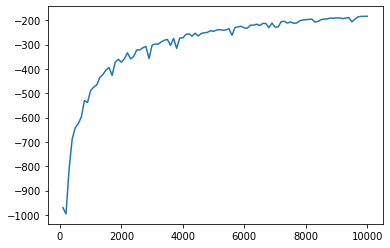

theta:  [2.7516340106496737, -8.29652853588282, 3.826048052696864, -0.07977170291512987, 0.3234257987199456, 0.13194014728111034, 0.11701206984246361, 0.08823231346303782, -0.009281502432314391, 0.04463229278808116, 0.11685483664095458, 0.1615663487099599, 0.2193824191084264, -0.1287803953497572, 0.13115737471495612, 0.005472900178445764, 0.5384717322246192, -0.18249569418963155, -7.84539678084169, 4.142052118485456]
theta offset:  0.49260631292838886


In [29]:

if __name__ == '__main__':
    # multiply_probabilities(1000)

    train_file = "C:/Users/87173/Desktop/term6/Machine Learning/Homework/HW3/HW3_data/4/diabetes_train.csv"
    with open(train_file) as train_file:
        lines = train_file.read().splitlines()

    train_data = [line.replace(',', '').split() for line in lines]
    train_y = [float(row[0]) for row in train_data]
    train_x_str = [row[1:] for row in train_data]
    train_x = [list(map(float, sublist)) for sublist in train_x_str]

    calculate_weight_theta_stochastic_gradient(train_x, train_y, eta=0.1, threshold=10000)
